## Overfiting o Underfitting

In [21]:
 from sklearn.datasets import load_breast_cancer
 from sklearn.ensemble import RandomForestClassifier
 from sklearn.model_selection import train_test_split
 from sklearn import metrics
 import pandas as pd
 import numpy as np
 from matplotlib import pyplot as plt
 import seaborn as sns
 sns.set_style('whitegrid')

In [2]:
df_delito = pd.read_csv('delitos_2021.csv', sep=";")
print(df_delito.tail(10))

       anio        mes        dia       fecha franja                   tipo  \
88557  2021  Diciembre     Jueves  23/12/2021     10  Hurto (sin violencia)   
88558  2021     Agosto     Jueves  05/08/2021     19   Robo (con violencia)   
88559  2021  Diciembre     Sábado  25/12/2021      3   Robo (con violencia)   
88560  2021  Noviembre    Viernes  19/11/2021      0   Robo (con violencia)   
88561  2021  Diciembre     Martes  21/12/2021     12   Robo (con violencia)   
88562  2021       Mayo     Sábado  08/05/2021     10  Hurto (sin violencia)   
88563  2021      Junio     Martes  29/06/2021     21   Robo (con violencia)   
88564  2021      Junio  Miércoles  30/06/2021     13   Robo (con violencia)   
88565  2021      Julio     Sábado  31/07/2021      1  Hurto (sin violencia)   
88566  2021    Octubre  Miércoles  06/10/2021     14  Hurto (sin violencia)   

      subtipo uso_armas         barrio  comuna     latitud    longitud  \
88557     NaN       NaN      Caballito     6.0  -34,6043

In [3]:
df_delito.head()

,anio,mes,dia,fecha,franja,tipo,subtipo,uso_armas,barrio,comuna,latitud,longitud,cantidad
0,2021,Enero,Miércoles,06/01/2021,18,Homicidio,Siniestro Vial,NaN,Constitución,1.0,"-34,62761","-58,379146",1
1,2021,Enero,Jueves,07/01/2021,10,Homicidio,Siniestro Vial,NaN,Mataderos,9.0,"-34,64972969","-58,51058958",1
2,2021,Enero,Domingo,10/01/2021,7,Homicidio,Siniestro Vial,NaN,Parque Chacabuco,7.0,"-34,62917196","-58,43058079",1
3,2021,Enero,Lunes,11/01/2021,9,Homicidio,Siniestro Vial,NaN,Nueva Pompeya,5.0,"-34,63867577","-58,4145554",1
4,2021,Enero,Lunes,11/01/2021,21,Homicidio,Siniestro Vial,NaN,Parque Avellaneda,9.0,"-34,64771436","-58,46806552",1


In [10]:
df_delito.shape
df_delito.describe()

,anio,comuna,cantidad
count,88567.0,87907.000000,88567.000000
mean,2021.0,7.538899,1.184143
std,0.0,4.554293,0.666930
min,2021.0,0.000000,1.000000
25%,2021.0,4.000000,1.000000
50%,2021.0,7.000000,1.000000
75%,2021.0,12.000000,1.000000
max,2021.0,15.000000,10.000000


### Normalizacion de Datos

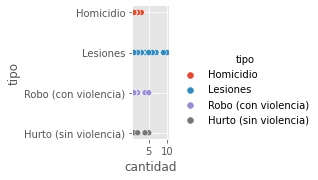

In [15]:
sns.pairplot(df_delito,x_vars=['cantidad'],y_vars=['tipo'],hue='tipo')

In [ ]:
# definimos matriz de diseño X y vector respuesta y
X = pd.DataFrame(df_delito['cantidad'], columns=df_delito['tipo'])
y = abs(pd.Series(df_delito['tipo'])-1)
# Separamos en entrenamiento/test en razon 80/20 %
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)
# Creamos un modelo Random Forest con parametros por defect
modelo = RandomForestClassifier(random_state=1)
modelo.fit(X_train, y_train)
# Obtenemos las predicciones del modelo con X_test
preds = modelo.predict(X_test) 